In [109]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn import mixture
from sklearn.decomposition import PCA

import pandas as pd

# Karate Club Network

Creator: "Mark Newman on Fri Jul 21 12:39:27 2006"
Number of vertices: 34
Number of edges: 78


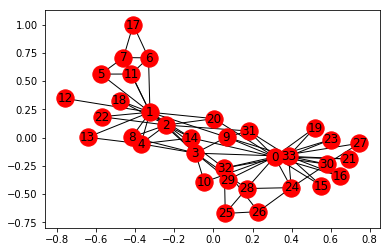

In [17]:
kn = nx.read_gml("data/karate-club.gml")

print("Creator: {}".format(kn.graph["Creator"].strip()))
print("Number of vertices: {}".format(kn.number_of_nodes()))
print("Number of edges: {}".format(kn.number_of_edges()))

nx.draw_networkx(kn)

# Gaussian Mixture

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


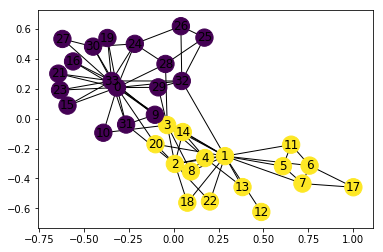

In [74]:
A = nx.adjacency_matrix(kn)
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
X_train = np.vstack(A.todense())

result = clf.fit_predict(X_train)

nx.draw_networkx(kn, node_color = result)

# Visualization based on our model in a 2D space (with PCA)

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


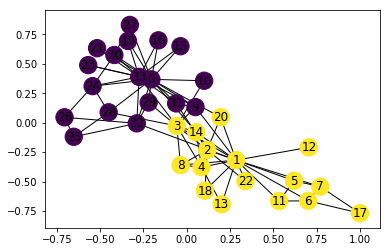

In [91]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

result = clf.fit_predict(principalComponents)

nx.draw_networkx(kn, node_color = result)

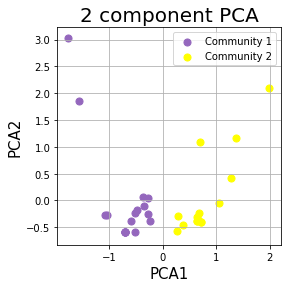

In [122]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
principalDf['target'] = result

# print(principalDf)

fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel("PCA1", fontsize = 15)
ax.set_ylabel("PCA2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)

colors = ["tab:purple", 'yellow']

for target, color in zip([0, 1], colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, "PCA1"],
               principalDf.loc[indicesToKeep, "PCA2"],
               c = color,
               s = 50)

ax.legend(['Community 1', 'Community 2'])
ax.grid()